[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Object Detection from Videos with YOLOv5

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/video-yolov5-detection.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/video-yolov5-detection.ipynb)

In this tutorial, we will use fastdup with a pretrained yolov5 object detection model to detect and crop from videos. Following that we analyze the cropped objects for issues such as duplicates, near-duplicates, outliers, bright/dark/blurry objects.

## Installation & Setting Up

In [ ]:
!pip install fastdup -Uq

In [4]:
import fastdup
fastdup.__version__

'0.910'

## Download & Extract Dataset

In [1]:
!gdown  --fuzzy https://drive.google.com/file/d/1fzmOgmRu557aU4lEbzL7XCf78KntFCeQ/view

Downloading...
From: https://drive.google.com/uc?id=1fzmOgmRu557aU4lEbzL7XCf78KntFCeQ
To: /media/dnth/Active-Projects/fastdup/examples/data.zip
100%|██████████████████████████████████████| 56.9M/56.9M [00:05<00:00, 10.4MB/s]


In [2]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/video_14.mp4       
  inflating: data/video_13.mp4       
  inflating: data/video_12.mp4       
  inflating: data/video_9.mp4        
  inflating: data/video_15.mp4       
  inflating: data/video_10.mp4       
  inflating: data/video_11.mp4       
  inflating: data/video_8.mp4        
  inflating: data/video_1.mp4        
  inflating: data/video_2.mp4        
  inflating: data/video_3.mp4        
  inflating: data/video_4.mp4        
  inflating: data/video_5.mp4        
  inflating: data/video_6.mp4        
  inflating: data/video_7.mp4        


## Video to Images

fastdup works on images. We must first turn the videos into frames of images.

We can use a one-liner fastdup utility function to turn all the videos in a folder into frames:

In [5]:
fastdup.extract_video_frames(input_dir="data", work_dir="frames")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-29 17:50:39 [INFO] Going to loop over dir data
2023-03-29 17:50:39 [INFO] Found total 15 videos to run on


0

## Run fastdup

Now that we have the frames of images, let's run fastdup and analyze the frames.

In [6]:
fd = fastdup.create(input_dir='frames', work_dir='yolov5_detection_work_dir')

In [7]:
fd.run(bounding_box='yolov5s', overwrite=True)

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-03-29 17:50:56 [INFO] Going to loop over dir frames
2023-03-29 17:50:56 [INFO] Found total 99 images to run on
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes 0 Features
2023-03-29 17:51:07 [INFO] Going to loop over dir /tmp/crops_input.csv
2023-03-29 17:51:07 [INFO] Found total 130 images to run on
2023-03-29 17:51:08 [INFO] Found total 130 images to run onstimated: 0 Minutes 0 Features
Finished histogram 0.174
Finished bucket sort 0.189
2023-03-29 17:51:08 [INFO] 13) Finished write_index() NN model
2023-03-29 17:51:08 [INFO] Stored nn model index file yolov5_detection_work_dir/nnf.index
2023-03-29 17:51:08 [INFO] Total time took 1021 ms
2023-03-29 17:51:08 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 %
2023-03-29 17:51:08 [INFO] Found a total of 6 nearly identical images(d>0.980), which are 1.54 %
2023-03-29 17:51:08 [INFO] Found a total of 65 a

## Components Gallery

We can visualize the cluster of similar detections using the components gallery view. Specify `draw_bbox=True` to see the detection bounding box on the original image.

100%|█████████████| 4/4 [00:00<00:00, 43.32it/s]


Finished OK. Components are stored as image files yolov5_detection_work_dir/galleries/components_[index].jpg
Stored components visual view in  yolov5_detection_work_dir/galleries/components.html
Execution time in seconds 0.2



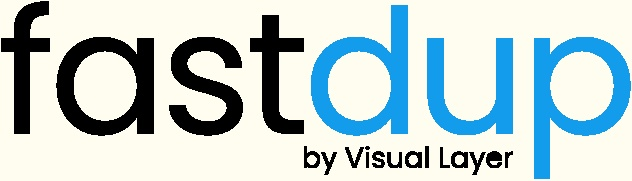
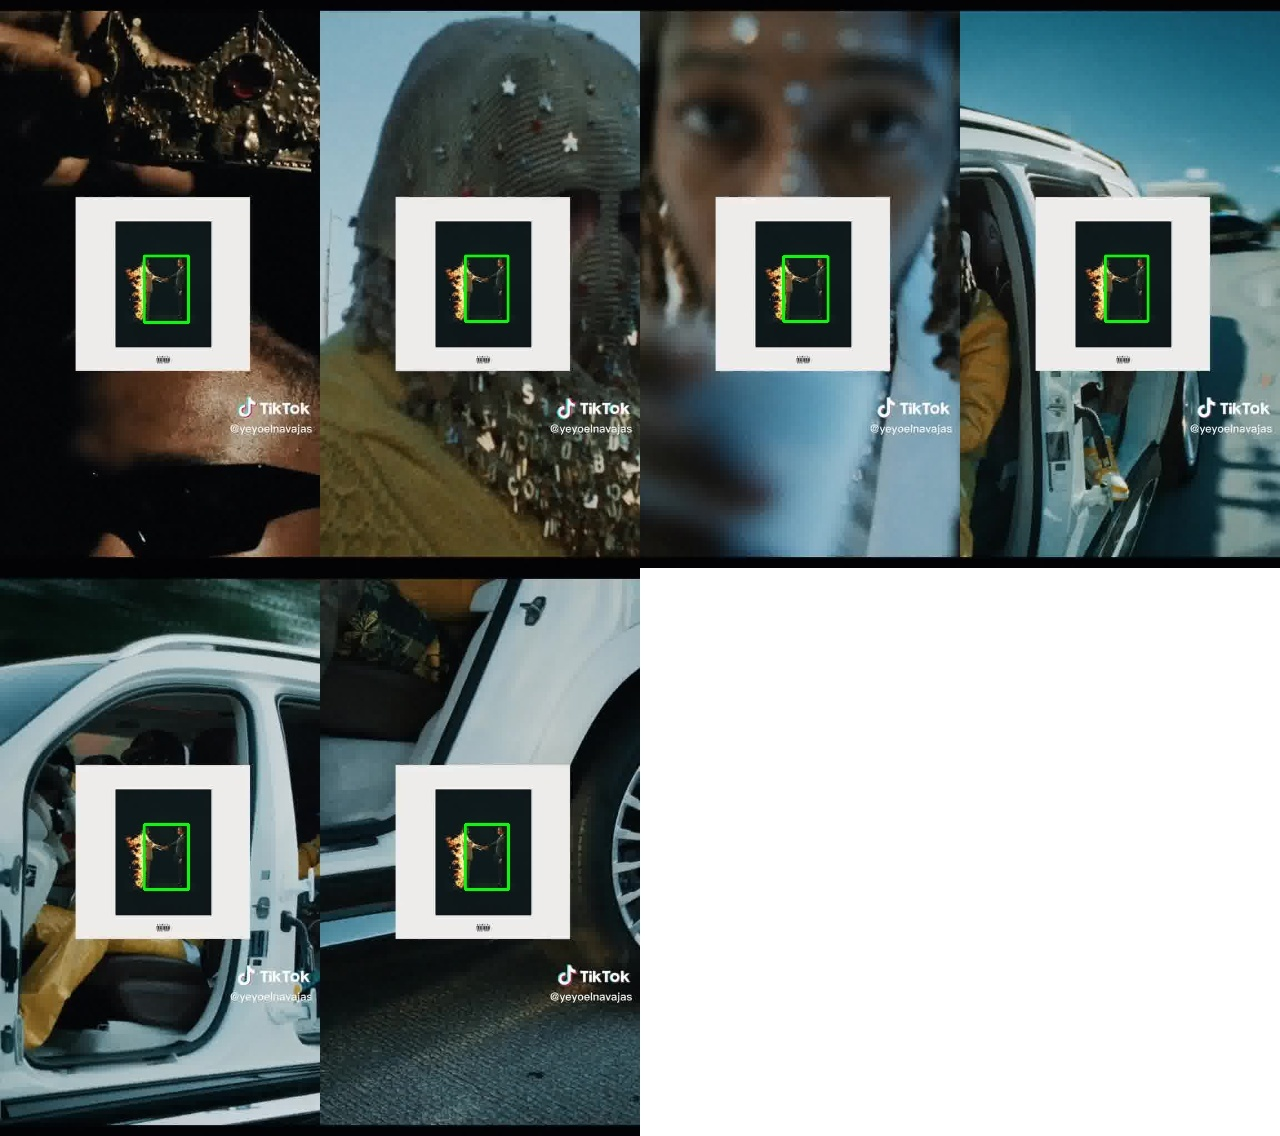
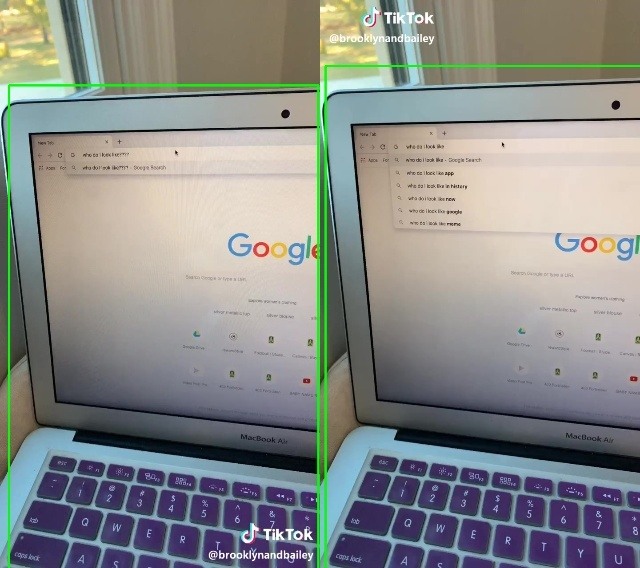
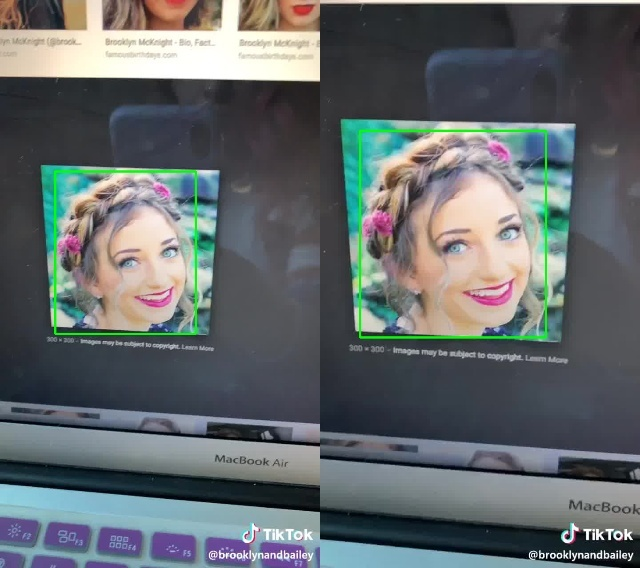
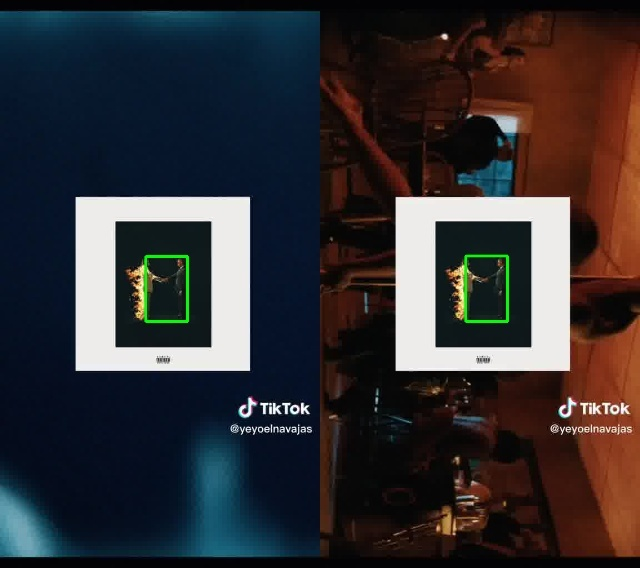

In [8]:
fd.vis.component_gallery(draw_bbox=True)

If you'd like to view just the cropped bounding box images, specify `draw_bbox=False`

100%|████████████| 4/4 [00:00<00:00, 110.03it/s]

Finished OK. Components are stored as image files yolov5_detection_work_dir/galleries/components_[index].jpg
Stored components visual view in  yolov5_detection_work_dir/galleries/components.html
Execution time in seconds 0.1



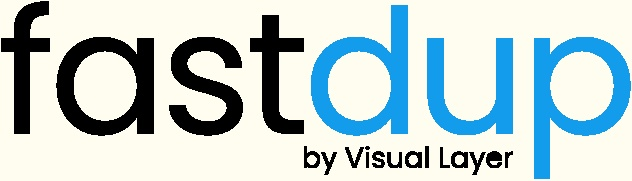
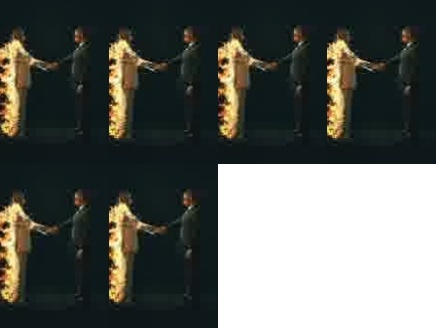
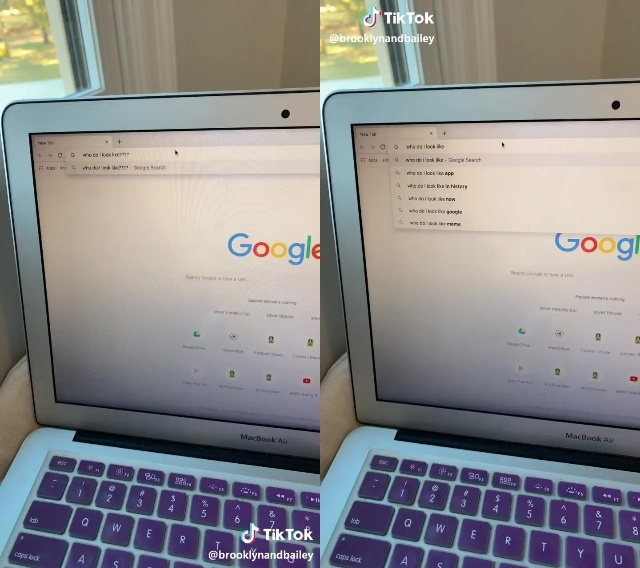
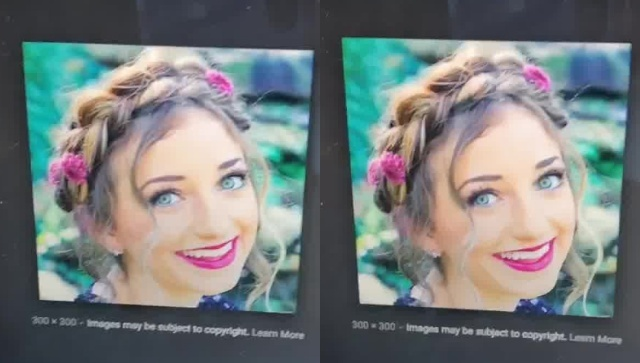
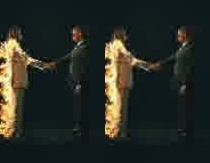

In [9]:
fd.vis.component_gallery(draw_bbox=False)

## Find Similar Objects Across Videos

Using the `similarity_gallery` view, we can find similar looking detections across all the extracted frames.

100%|██████████| 20/20 [00:00<00:00, 109.04it/s]


Stored similar images visual view in  yolov5_detection_work_dir/galleries/similarity.html



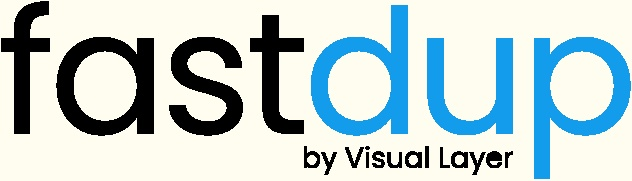
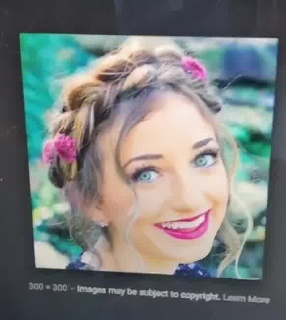
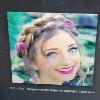
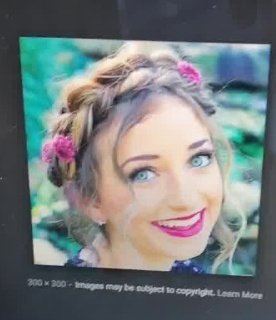
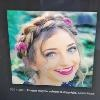
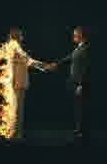
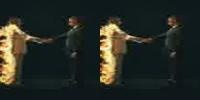
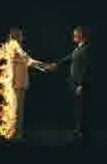
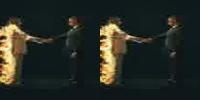
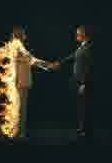
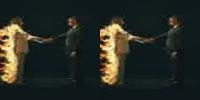
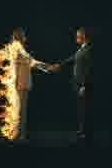
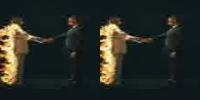
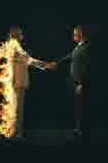
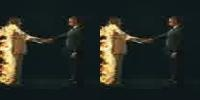
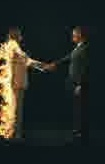
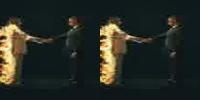
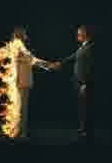
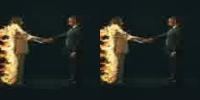
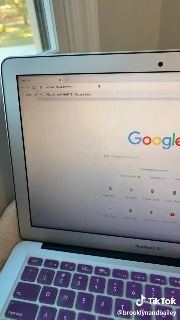
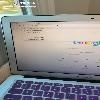
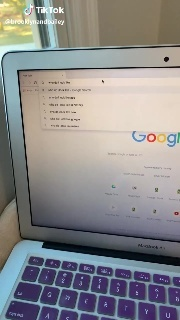
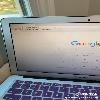
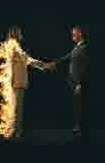
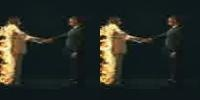
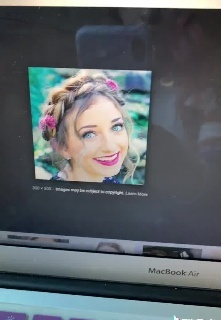
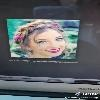
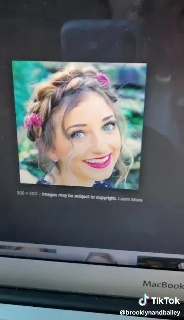
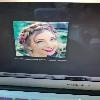
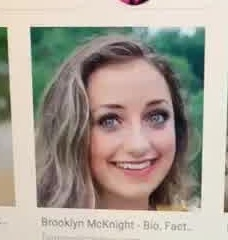
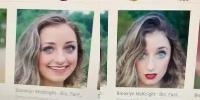
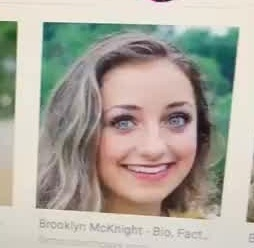
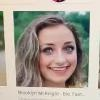
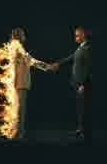
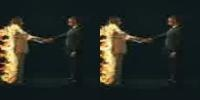
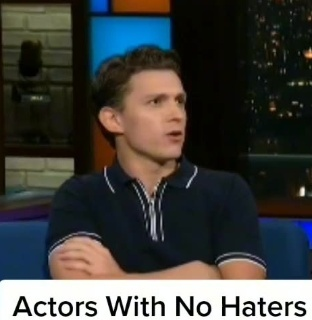
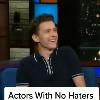
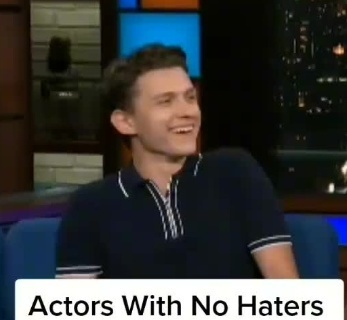
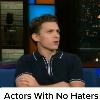
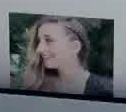
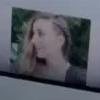

from  \
18    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000009.jpg_90_294_418_466.jpg   
16   yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000008.jpg_124_386_316_366.jpg   
44    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000019.jpg_261_461_77_118.jpg   
45    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000020.jpg_261_461_77_118.jpg   
46    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000021.jpg_259_462_80_117.jpg   
41    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000016.jpg_259_461_80_120.jpg   
43    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000018.jpg_261_462_78_117.jpg   
42    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000017.jpg_262_461_75_118.jpg   
40    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000015.jpg_258_462_80_117.jpg   
1    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000004.jpg_20_192_696_1090.jpg   
0    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000003.jpg_12_148_716_1134.jpg   
38    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000011.jpg_262_462_75_117.jpg   
15    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000008.jpg_10_302_704_744.jpg   
17    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000009.jpg_4_240_724_1044.jpg   
11   yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000007.jpg_260_282_164_172.jpg   
5    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000006.jpg_444_410_182_178.jpg   
37    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000010.jpg_259_461_77_118.jpg   
33   yolov5_detection_work_dir/crops/framesdatavideo_2.mp4output_000002.jpg_102_251_330_339.jpg   
32    yolov5_detection_work_dir/crops/framesdatavideo_2.mp4output_000001.jpg_86_253_366_338.jpg   
13     yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000007.jpg_312_726_90_80.jpg   
7     yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000006.jpg_468_872_108_88.jpg   
24   yolov5_detection_work_dir/crops/framesdatavideo_10.mp4output_000005.jpg_-2_202_558_824.jpg   
21    yolov5_detection_work_dir/crops/framesdatavideo_10.mp4output_000001.jpg_8_214_542_808.jpg   
12   yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000007.jpg_280_518_132_156.jpg   
6    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000006.jpg_444_650_148_174.jpg   
39    yolov5_detection_work_dir/crops/framesdatavideo_3.mp4output_000012.jpg_264_461_75_118.jpg   
29   yolov5_detection_work_dir/crops/framesdatavideo_14.mp4output_000001.jpg_42_509_141_357.jpg   
30   yolov5_detection_work_dir/crops/framesdatavideo_14.mp4output_000002.jpg_14_523_144_355.jpg   
4     yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000006.jpg_288_856_100_74.jpg   
10     yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000007.jpg_144_726_76_68.jpg   
23    yolov5_detection_work_dir/crops/framesdatavideo_10.mp4output_000004.jpg_46_-3_526_603.jpg   
22  yolov5_detection_work_dir/crops/framesdatavideo_10.mp4output_000004.jpg_106_146_275_462.jpg   
9    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000007.jpg_106_286_110_164.jpg   
3    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000006.jpg_270_408_124_168.jpg   
20    yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000011.jpg_20_70_702_1192.jpg   
19   yolov5_detection_work_dir/crops/framesdatavideo_1.mp4output_000010.jpg_10_134_714_1128.jpg   
48    yolov5_detection_work_dir/crops/framesdatavideo_6.mp4output_000005.jpg_21_32_557_1000.jpg   
49      yolov5_detection_work_dir/crops/framesdatavideo_6.mp4output_000007.jpg_2_22_549_957.jpg   
25   yolov5_detection_work_dir/crops/framesdatavideo_10.mp4output_000006.jpg_-6_166_579_856.jpg   
47      yolov5_detection_work_dir/crops/framesdatavideo_6.mp4output_000003.jpg_2_13_560_995.jpg   
31  yolov5_detection_work_dir/cr

In [10]:
fd.vis.similarity_gallery(draw_bbox=False)

## Find Outliers

Useing the `outliers_gallery` we can also visualize detections that looks visually different from others.

100%|████████| 11/11 [00:00<00:00, 33924.52it/s]

Stored outliers visual view in  yolov5_detection_work_dir/galleries/outliers.html



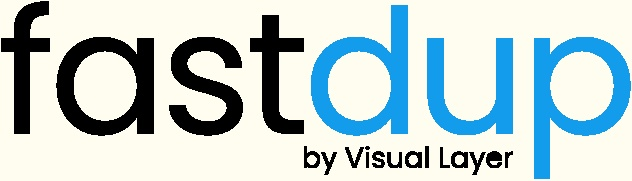
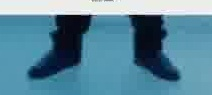
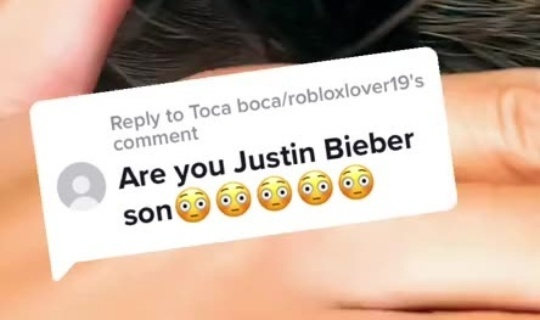
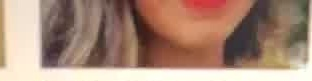
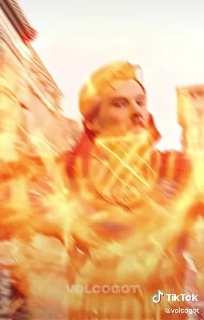
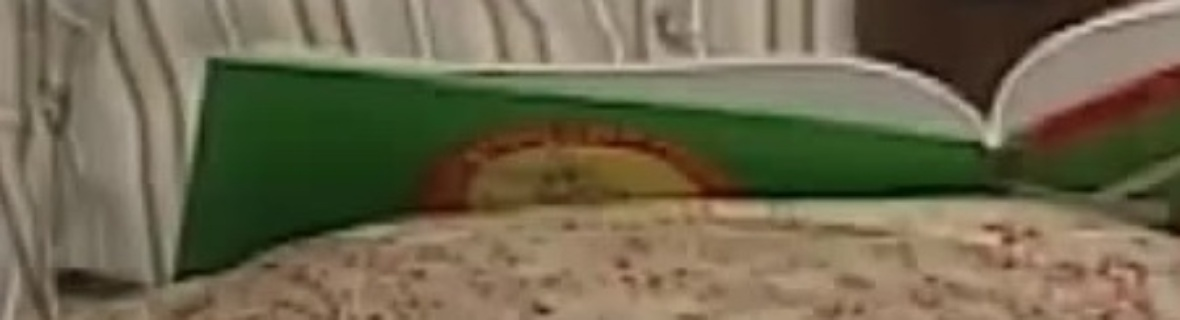
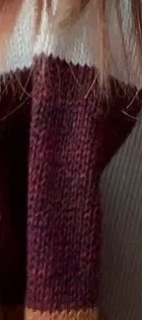
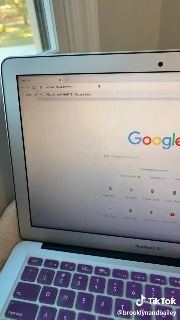
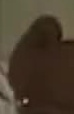
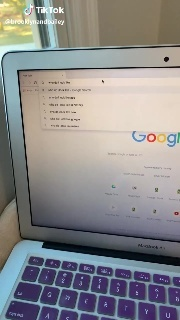
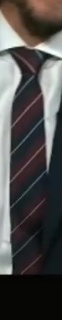
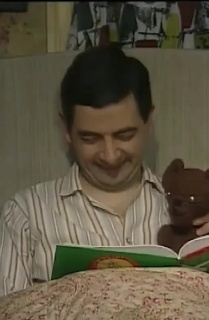

In [11]:
fd.vis.outliers_gallery()

## Duplicate Detections

With the `duplicates_gallery` view, visualize duplicate image pairs across videos.

100%|██████████| 20/20 [00:00<00:00, 272.91it/s]


Stored similarity visual view in  yolov5_detection_work_dir/galleries/duplicates.html



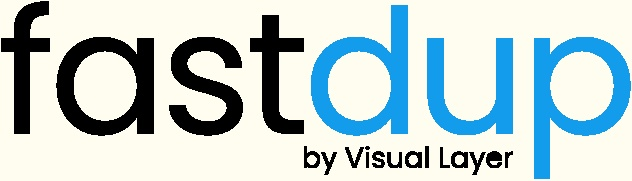
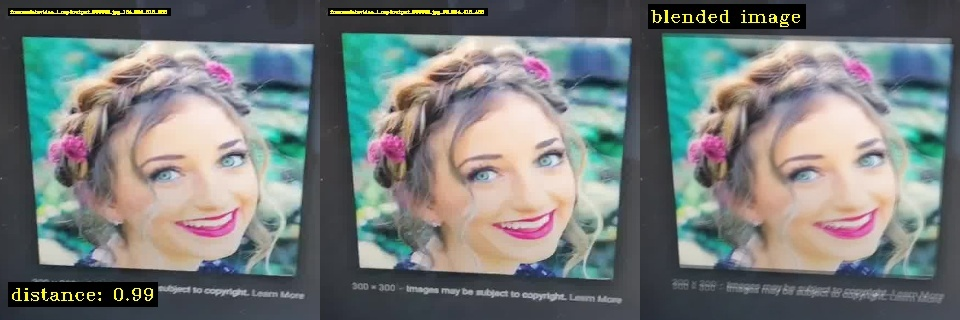
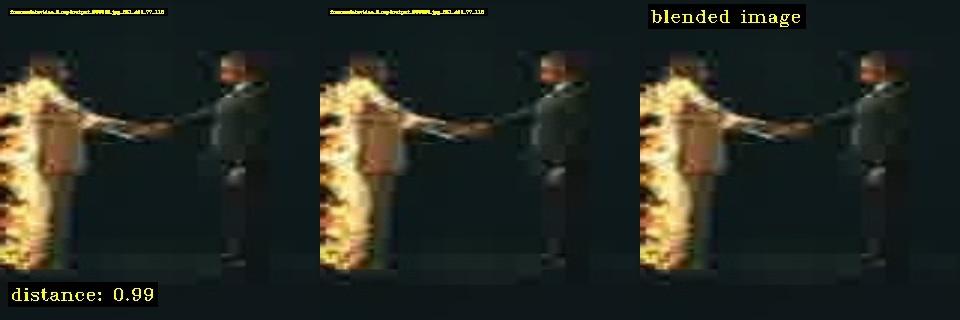
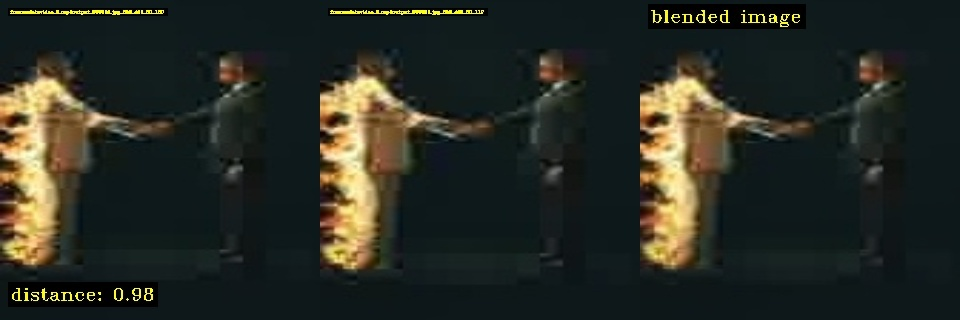
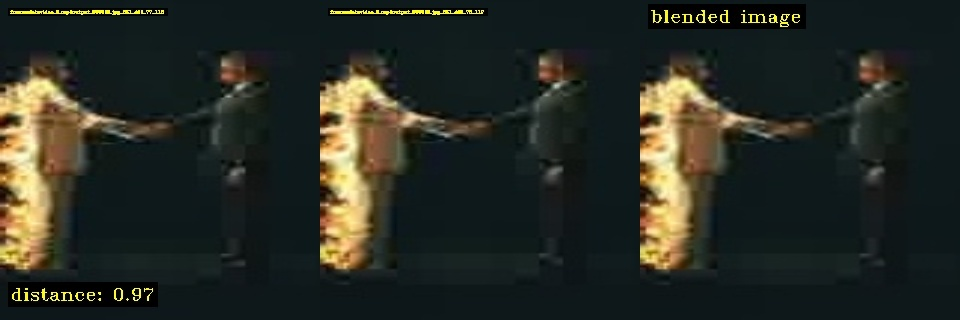
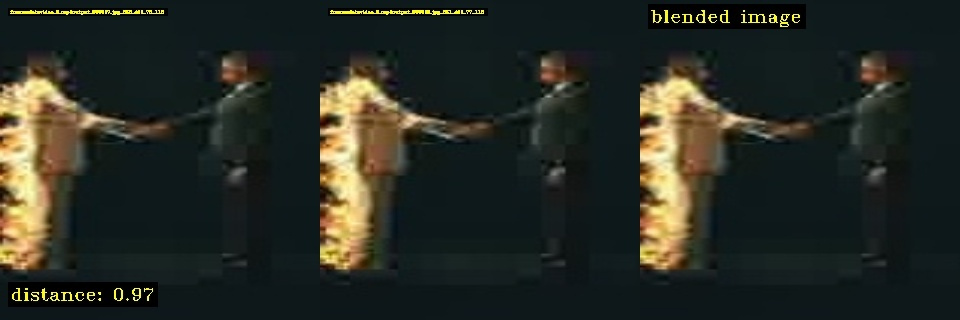
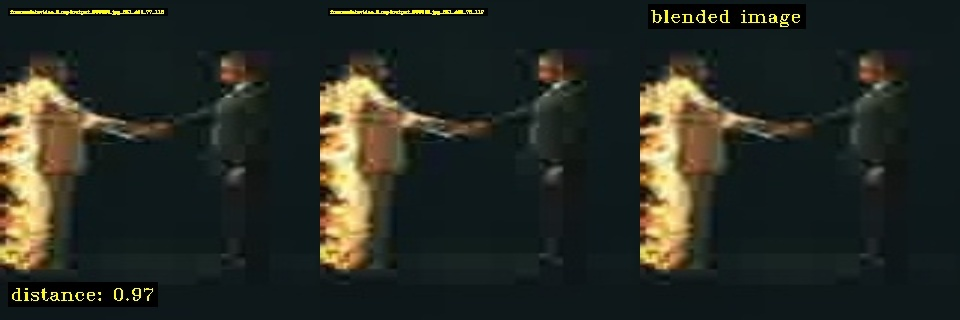
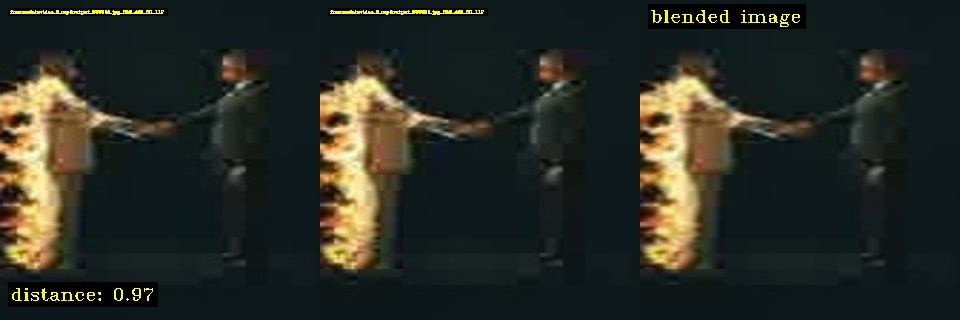
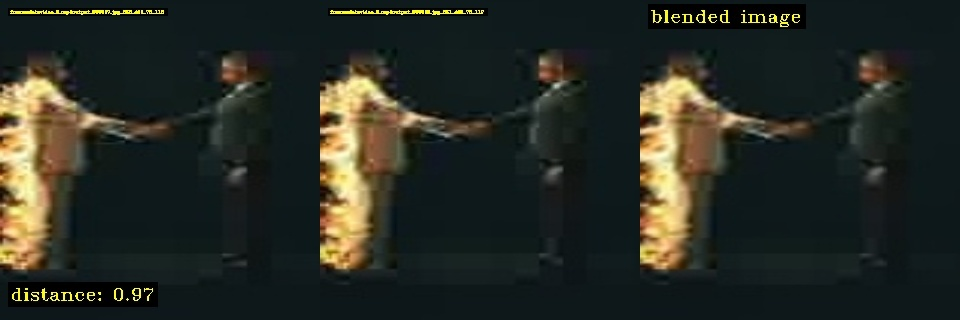
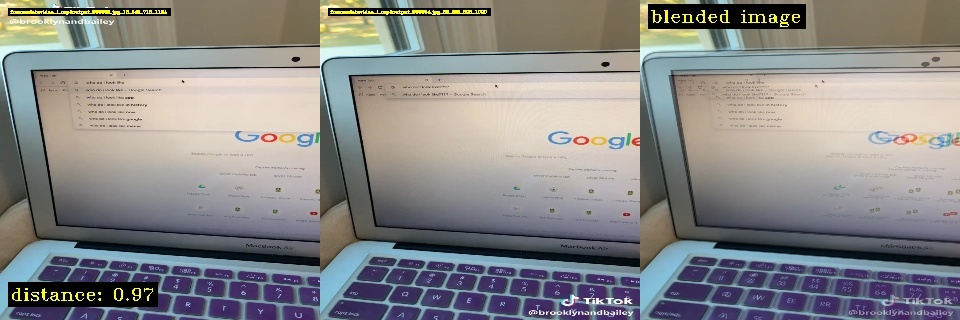
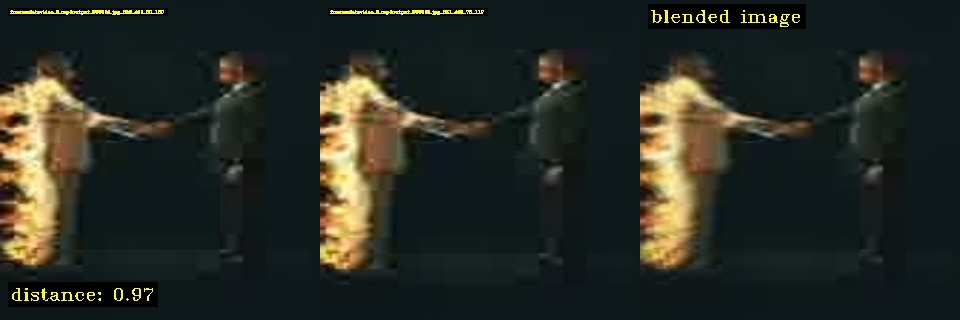
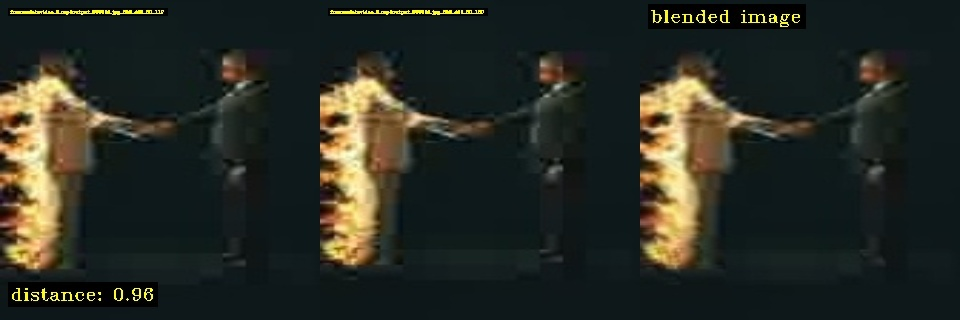
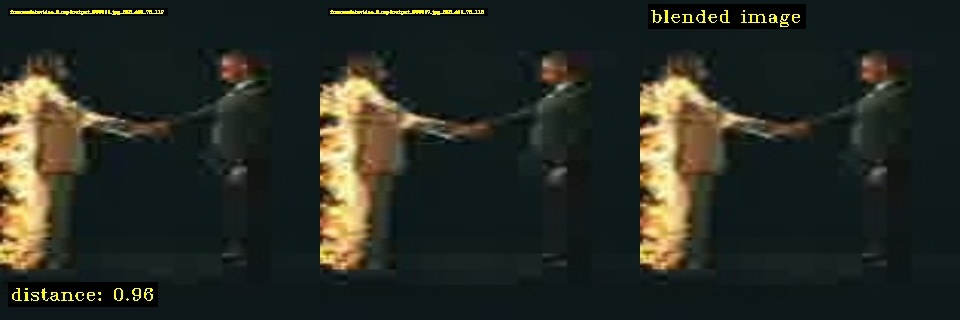
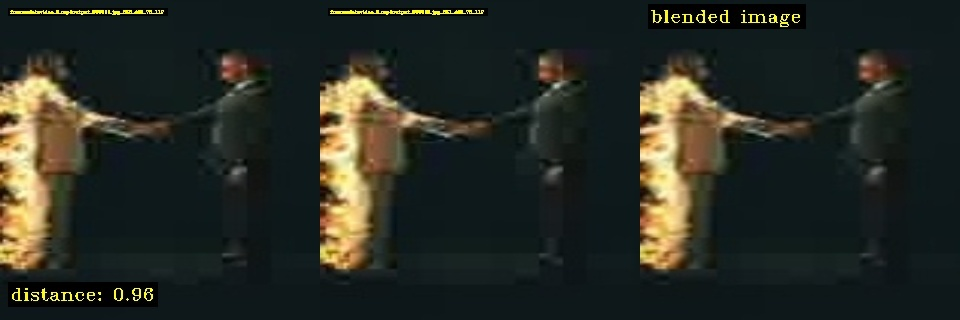

In [12]:
fd.vis.duplicates_gallery()

## Dark Detections

Using the `stats_gallery` view, we can sort the detections following a desired `metric` such as 'dark', 'bright' and 'blur'. 

100%|██████████| 20/20 [00:00<00:00, 800.01it/s]

Stored mean visual view in  yolov5_detection_work_dir/galleries/mean.html



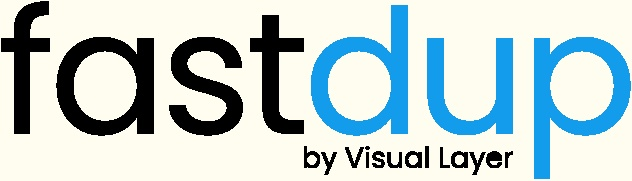
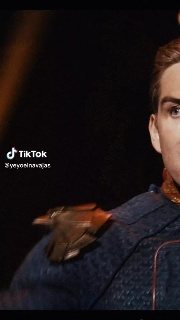
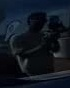
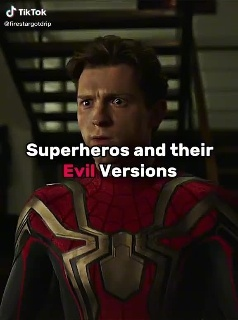
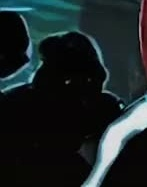
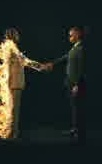
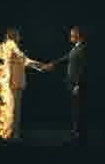
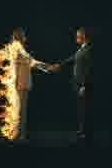
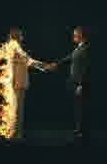
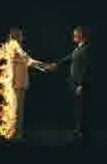
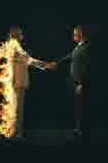
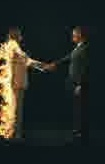
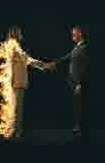
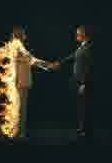
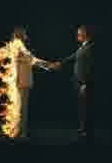
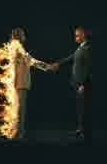
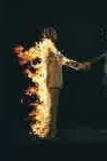
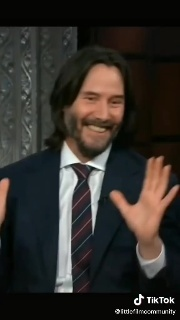
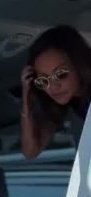
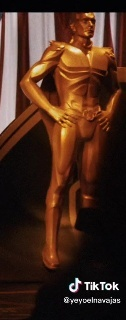
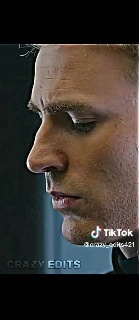

In [13]:
fd.vis.stats_gallery(metric='dark')

## Bright Detections

100%|██████████| 20/20 [00:00<00:00, 415.64it/s]


Stored mean visual view in  yolov5_detection_work_dir/galleries/mean.html



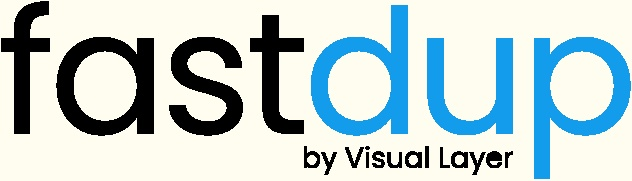
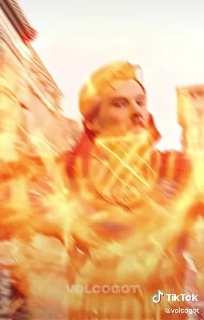
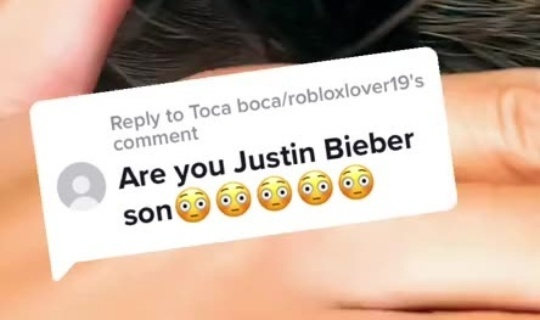
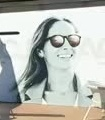
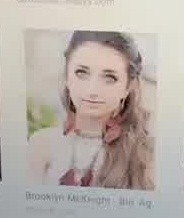
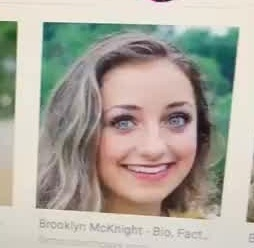
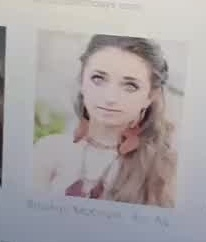
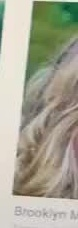
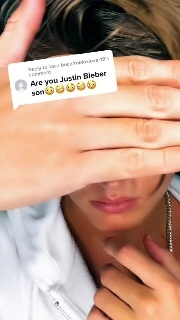
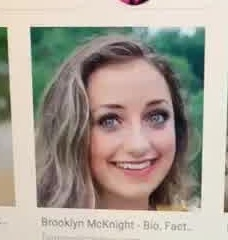
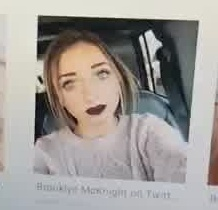
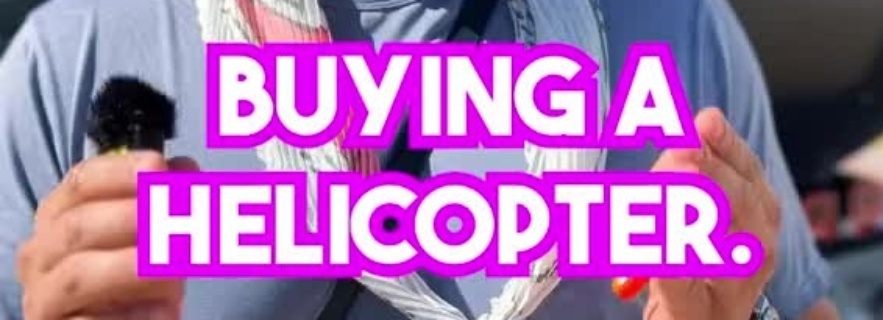
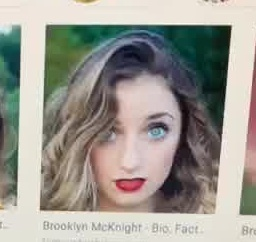
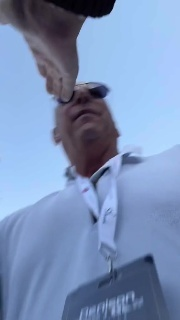
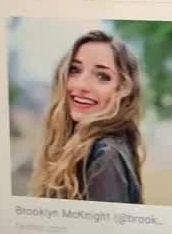
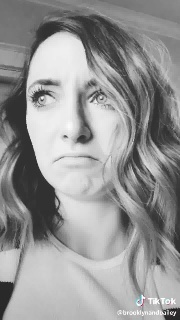
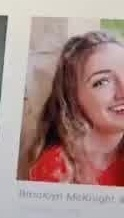
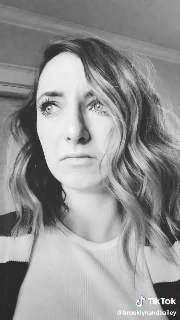
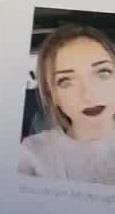
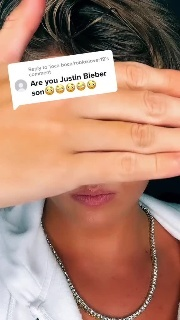
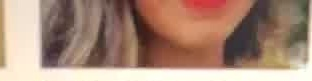

In [14]:
fd.vis.stats_gallery(metric='bright')

## Blurry Detections

100%|██████████| 20/20 [00:00<00:00, 989.84it/s]


Stored blur visual view in  yolov5_detection_work_dir/galleries/blur.html



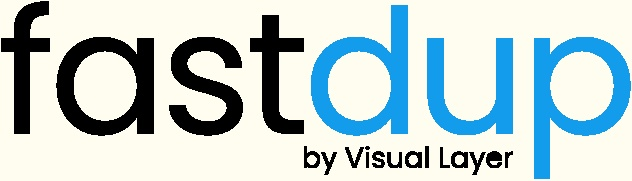
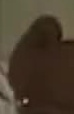
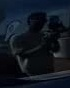
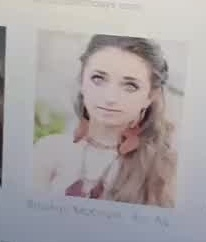
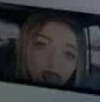
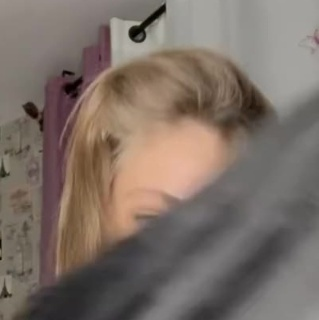
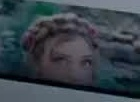
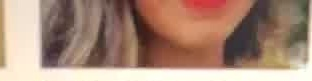
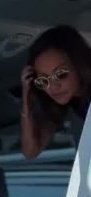
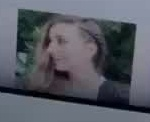
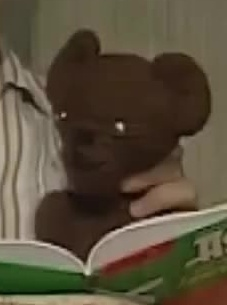
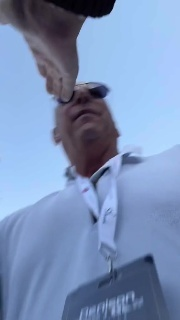
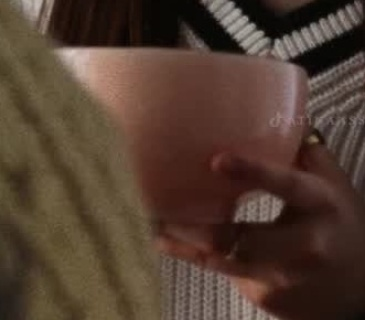
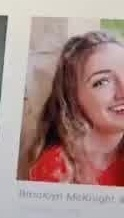
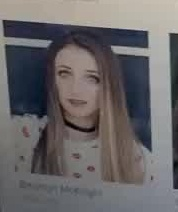
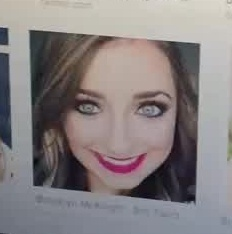
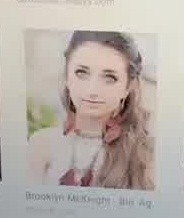
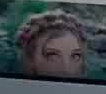
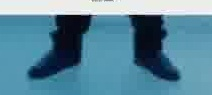
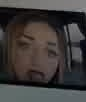
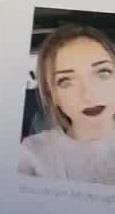

In [15]:
fd.vis.stats_gallery(metric='blur')

## Wrap Up

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).